In [1]:
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale


from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [2]:
import pandas as pd
basefinal = pd.read_csv("Base_final_incendios-2.csv")
basefinal


,sector,año,mes,conteo_vias,si_hubo_incendio,frecuencia_incendios,distancia_promedio_entre_incendios,promedio_distancia_vias,moda_vias,uso_tierra_moda,conteo_mineria
0,50011000,2020,1,11114.0,0,0.0,999999.000000,999999.000000,1,4,0.0
1,50011000,2020,2,11114.0,0,0.0,999999.000000,999999.000000,1,4,0.0
2,50011000,2020,3,11114.0,0,0.0,999999.000000,999999.000000,1,4,0.0
3,50011000,2020,4,11114.0,0,0.0,999999.000000,999999.000000,1,4,0.0
4,50011000,2020,5,11114.0,0,0.0,999999.000000,999999.000000,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
804265,997733130,2024,5,1.0,0,0.0,999999.000000,999999.000000,19,4,0.0
804266,997733130,2024,6,1.0,1,1.0,155181.357056,999999.000000,19,4,0.0
804267,997733130,2024,7,1.0,0,0.0,999999.000000,999999.000000,19,4,0.0
804268,997733130,2024,8,1.0,1,8.0,200343.387452,999999.000000,19,4,0.0


In [3]:
basefinal.corr()

,sector,año,mes,conteo_vias,si_hubo_incendio,frecuencia_incendios,distancia_promedio_entre_incendios,promedio_distancia_vias,moda_vias,uso_tierra_moda,conteo_mineria
sector,1.000000e+00,-5.610288e-12,-9.085385e-15,-2.442709e-03,-0.209709,-0.067278,0.192943,0.125261,-7.461745e-02,-5.911637e-02,-8.740007e-02
año,-5.610288e-12,1.000000e+00,-1.076619e-01,4.458550e-13,0.014844,-0.006012,-0.023266,-0.008726,-2.084118e-12,-1.228580e-13,2.445444e-12
mes,-9.085385e-15,-1.076619e-01,1.000000e+00,6.318194e-16,-0.113591,-0.077126,0.102073,0.062336,-2.573275e-15,-6.221882e-16,2.212195e-15
conteo_vias,-2.442709e-03,4.458550e-13,6.318194e-16,1.000000e+00,0.044017,0.007433,-0.045083,-0.073329,-4.472244e-02,-4.542099e-03,-5.131499e-03
si_hubo_incendio,-2.097091e-01,1.484424e-02,-1.135910e-01,4.401750e-02,1.000000,0.302462,-0.916815,-0.657111,-1.033938e-02,3.313684e-02,4.586600e-02
frecuencia_incendios,-6.727810e-02,-6.012103e-03,-7.712619e-02,7.432830e-03,0.302462,1.000000,-0.301918,-0.154878,1.376871e-02,1.139653e-02,9.684995e-03
distancia_promedio_entre_incendios,1.929430e-01,-2.326589e-02,1.020728e-01,-4.508258e-02,-0.916815,-0.301918,1.000000,0.599951,1.978972e-03,-3.114138e-02,-4.785405e-02
promedio_distancia_vias,1.252607e-01,-8.725606e-03,6.233649e-02,-7.332935e-02,-0.657111,-0.154878,0.599951,1.000000,8.478520e-02,-2.319252e-02,3.481402e-03
moda_vias,-7.461745e-02,-2.084118e-12,-2.573275e-15,-4.472244e-02,-0.010339,0.013769,0.001979,0.084785,1.000000e+00,-2.779234e-02,4.061328e-02
uso_tierra_moda,-5.911637e-02,-1.228580e-13,-6.221882e-16,-4.542099e-03,0.033137,0.011397,-0.031141,-0.023193,-2.779234e-02,1.000000e+00,1.021549e-02


### Rebalanceo de clases

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X, y = make_classification(n_samples=100000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Distribución de clases antes del rebalanceo:")
print({label: count for label, count in zip(*np.unique(y_train, return_counts=True))})


over = SMOTE(sampling_strategy=0.5)  
under = RandomUnderSampler(sampling_strategy=0.8)  
pipeline = Pipeline(steps=[('over', over), ('under', under)])


X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

print("\nDistribución de clases después del rebalanceo:")
print({label: count for label, count in zip(*np.unique(y_resampled, return_counts=True))})


Distribución de clases antes del rebalanceo:
{0: 62726, 1: 7274}

Distribución de clases después del rebalanceo:
{0: 39203, 1: 31363}


### Regresión Logística

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'))
])


param_distributions = {
    'classifier__C': uniform(0.001, 500),  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__max_iter': randint(50, 100),  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Mejores hiperparámetros encontrados:
 {'classifier__C': 187.27105942368124, 'classifier__max_iter': 78, 'classifier__penalty': 'l1'}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7841
           1       0.84      0.86      0.85      6273

    accuracy                           0.86     14114
   macro avg       0.86      0.86      0.86     14114
weighted avg       0.86      0.86      0.86     14114

Precisión del modelo: 0.86


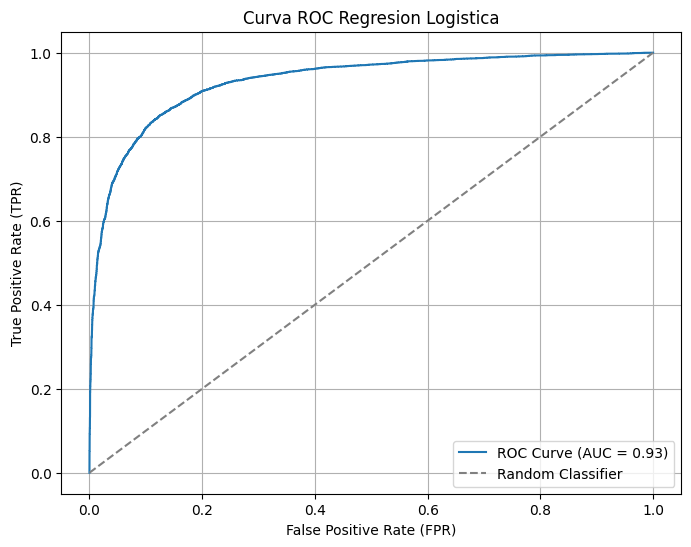

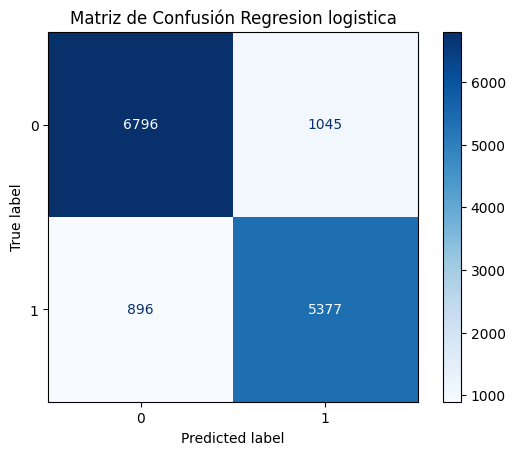

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC Regresion Logistica')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Regresion logistica")
plt.show()

El modelo de regresión logística con los mejores hiperparámetros encontrados (C=187.27, max_iter=78, penalty='l1') muestra un buen desempeño general. Con una precisión global del 86%, el modelo tiene una capacidad bastante sólida para clasificar tanto la clase 0 como la clase 1, con un buen balance entre precisión y recall, especialmente para la clase 1, que podría ser más difícil de predecir debido a su menor frecuencia. 

### Árboles de decisión 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])


param_distributions = {
    'classifier__max_depth': randint(1, 20),  
    'classifier__min_samples_split': randint(2, 20),  
    'classifier__min_samples_leaf': randint(1, 10)  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1 
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)

print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Mejores hiperparámetros encontrados:
 {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7841
           1       0.83      0.88      0.85      6273

    accuracy                           0.87     14114
   macro avg       0.86      0.87      0.86     14114
weighted avg       0.87      0.87      0.87     14114

Precisión del modelo: 0.87


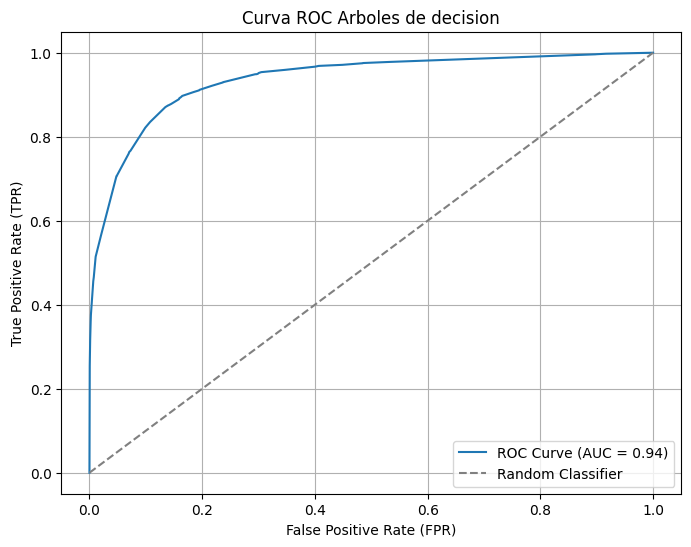

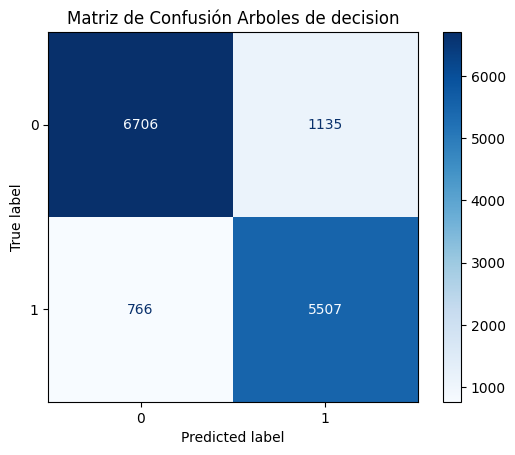

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC Arboles de decision')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Arboles de decision")
plt.show()

El modelo de Árboles de Decisión con los mejores hiperparámetros (max_depth=6, min_samples_leaf=2, min_samples_split=2) muestra un buen desempeño general con una precisión del 87%. Aunque el rendimiento en la precisión y recall de la clase 0 (negativa) es ligeramente mejor que en la clase 1 (positiva), el modelo aún tiene un buen desempeño en ambas clases, logrando un buen equilibrio entre la capacidad de detección (recall) y la exactitud (precisión).

### KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform



X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])


param_distributions = {
    'classifier__n_neighbors': randint(1, 20),  
    'classifier__weights': ['uniform', 'distance'],  
    'classifier__p': [1, 2], 
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan'],  # Tipo de métrica para la distancia
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)

print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Mejores hiperparámetros encontrados:
 {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 1, 'classifier__p': 2, 'classifier__weights': 'distance'}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      7841
           1       0.84      1.00      0.91      6273

    accuracy                           0.92     14114
   macro avg       0.92      0.92      0.92     14114
weighted avg       0.93      0.92      0.92     14114

Precisión del modelo: 0.92


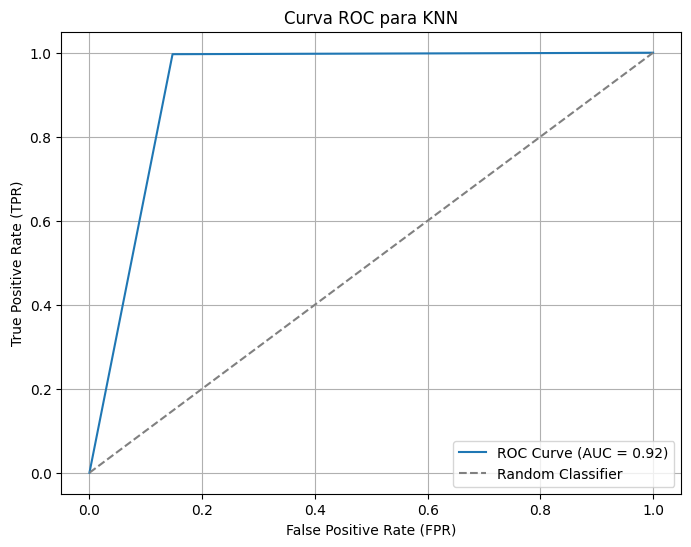

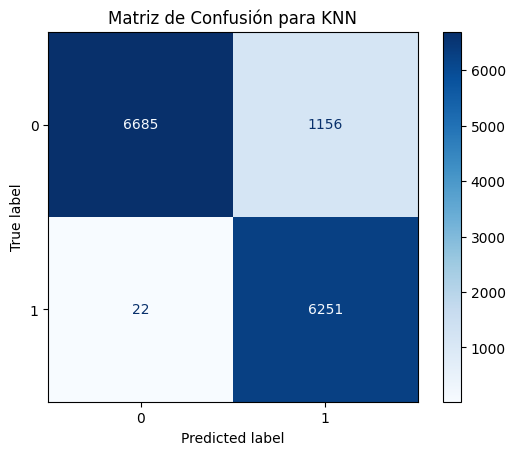

In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para KNN')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para KNN")
plt.show()

El modelo KNN tiene un buen desempeño global y es especialmente eficaz para detectar instancias de la clase 1 . Sin embargo, su capacidad para identificar la clase 0 es algo más limitada, lo que puede ser una limitación dependiendo de los objetivos específicos del modelo.

### Random Forest 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])


param_distributions = {
    'classifier__n_estimators': randint(10, 100),  
    'classifier__max_depth': randint(1, 20),  
    'classifier__min_samples_split': randint(2, 20),  
    'classifier__min_samples_leaf': randint(1, 10),  
    'classifier__max_features': uniform(0.1, 1.0),  
    'classifier__bootstrap': [True, False]  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


C:\Users\alejo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alejo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alejo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packa

Mejores hiperparámetros encontrados:
 {'classifier__bootstrap': True, 'classifier__max_depth': 15, 'classifier__max_features': 0.8319939418114051, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 92}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7841
           1       0.86      0.90      0.88      6273

    accuracy                           0.89     14114
   macro avg       0.89      0.89      0.89     14114
weighted avg       0.89      0.89      0.89     14114

Precisión del modelo: 0.89


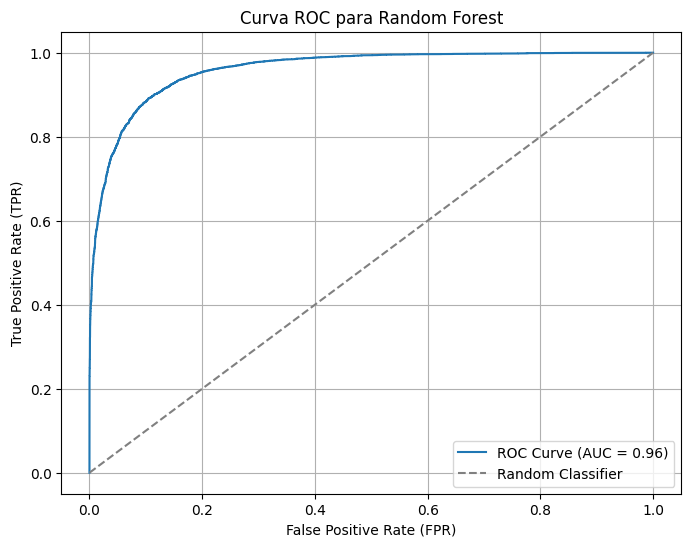

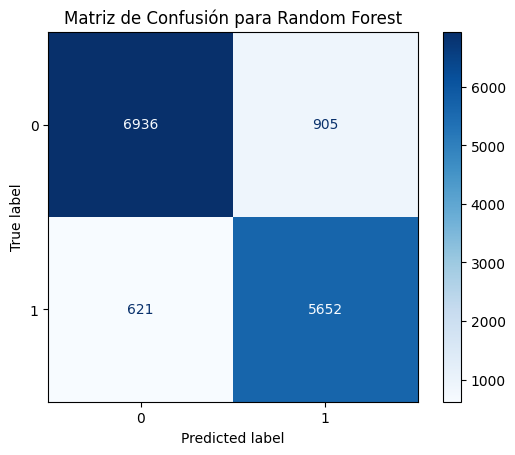

In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para Random Forest")
plt.show()

El modelo Random Forest muestra un buen desempeño general, con una precisión global del 89%. Sin embargo, presenta un ligero sesgo en la clasificación de las dos clases:

Para la clase 0 , el modelo tiene un buen desempeño con una precisión de 0.92, pero el recall es un poco más bajo (0.88), lo que sugiere que pierde algunas instancias de la clase 0.
Para la clase 1 , el modelo tiene un buen equilibrio con un recall de 0.90, lo que significa que puede identificar la mayoría de las instancias de la clase 1. Sin embargo, su precisión es un poco más baja (0.86), lo que indica que clasifica algunas instancias incorrectamente como clase 1.

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform



X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=42))
])


param_distributions = {
    'classifier__n_estimators': randint(20, 100),  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_

y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Mejores hiperparámetros encontrados:
 {'classifier__n_estimators': 91}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7841
           1       0.86      0.85      0.85      6273

    accuracy                           0.87     14114
   macro avg       0.87      0.87      0.87     14114
weighted avg       0.87      0.87      0.87     14114

Precisión del modelo: 0.87


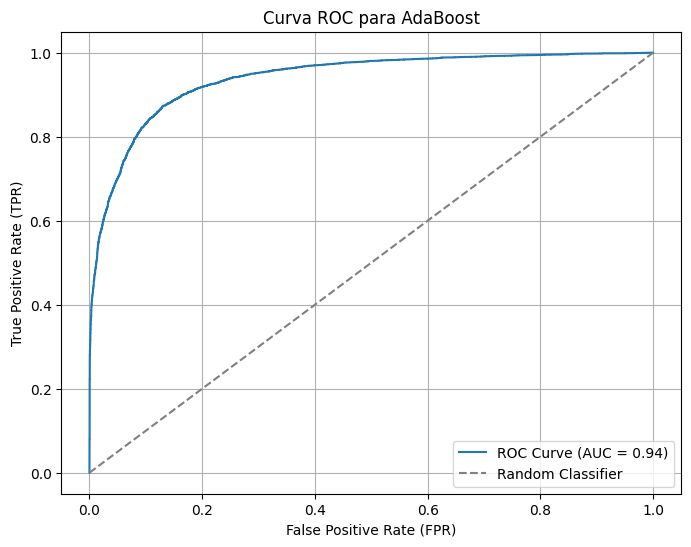

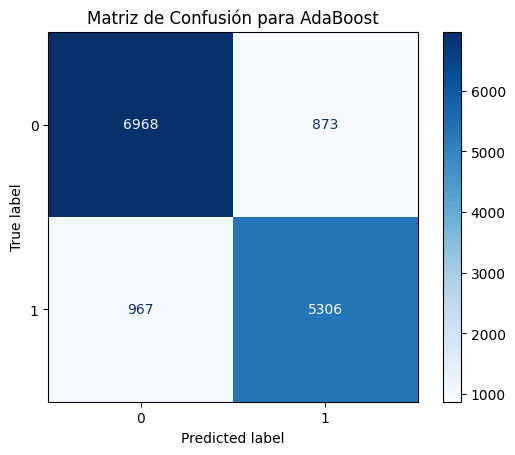

In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para AdaBoost')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para AdaBoost")
plt.show()

El modelo AdaBoost presenta un buen desempeño general con una precisión global del 87%. Las métricas de precisión, recall y F1-score para ambas clases son bastante similares, lo que indica que el modelo tiene un rendimiento equilibrado en ambas clases:

Clase 0: Aunque tiene una precisión de 0.88, el recall es algo mejor (0.89), lo que sugiere que el modelo es eficiente para identificar la mayoría de las instancias de la clase 0.
Clase 1: Aunque la precisión es ligeramente más baja (0.86), el recall (0.85) es razonablemente alto, indicando que el modelo también es capaz de identificar una buena proporción de las instancias positivas.


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

param_distributions = {
    'classifier__n_estimators': randint(50, 100),  
    'classifier__max_depth': randint(1, 5),  
    'classifier__min_samples_split': randint(2, 10),  
    'classifier__min_samples_leaf': randint(1, 10), 
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Mejores hiperparámetros encontrados:
 {'classifier__max_depth': 4, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 71}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7841
           1       0.86      0.86      0.86      6273

    accuracy                           0.88     14114
   macro avg       0.87      0.87      0.87     14114
weighted avg       0.88      0.88      0.88     14114

Precisión del modelo: 0.88


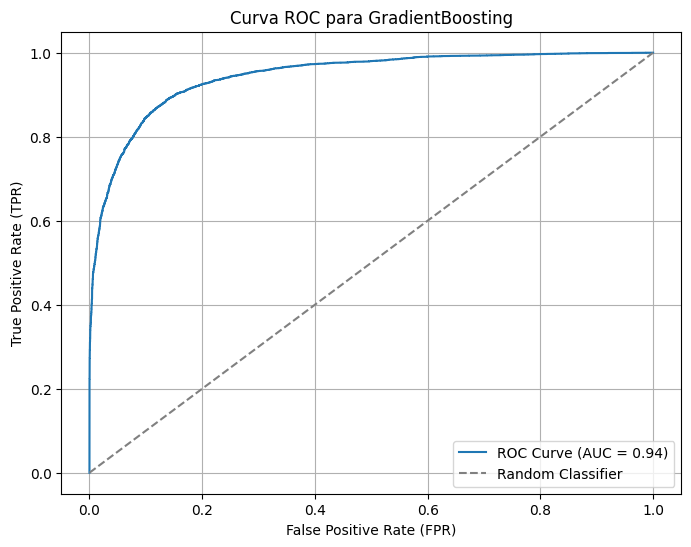

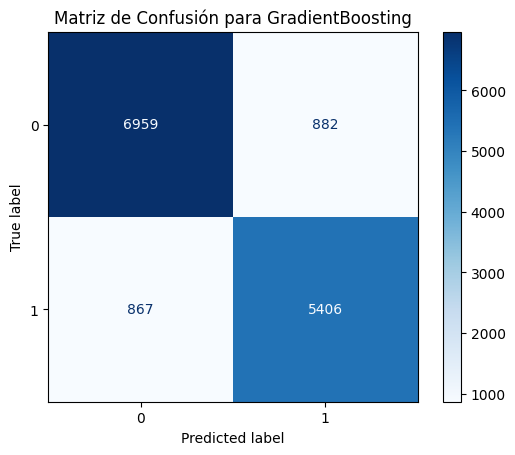

In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para GradientBoosting')
plt.legend(loc='best')
plt.grid()
plt.show()

cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para GradientBoosting")
plt.show()

El modelo de Gradient Boosting muestra un rendimiento sólido con una precisión global del 88%. Ambas clases tienen resultados relativamente equilibrados en términos de precisión, recall y F1-score:

Clase 0 : El modelo tiene una alta precisión (0.89) y recall (0.89) para esta clase, lo que sugiere que es efectivo para detectar la clase negativa sin demasiados falsos negativos.

Clase 1 : Aunque la precisión y recall para la clase 1 son ligeramente menores (0.86), el modelo aún es bastante eficaz para identificar esta clase.
El modelo tiene un buen balance entre precisión y recall en general, con un rendimiento consistente en ambas clases. El F1-score ponderado de 0.88 refleja que el modelo tiene un desempeño equilibrado y robusto en el conjunto de datos.

### XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42, eval_metric='mlogloss'))
])

param_distributions = {
    'classifier__n_estimators': randint(50, 200),  
    'classifier__learning_rate': uniform(0.01, 0.3),  
    'classifier__max_depth': randint(3, 10),  
    'classifier__min_child_weight': randint(1, 10),  
    'classifier__subsample': uniform(0.5, 0.5),  
    'classifier__colsample_bytree': uniform(0.5, 0.5),  
    'classifier__gamma': uniform(0, 1)  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Mejores hiperparámetros encontrados:
 {'classifier__colsample_bytree': 0.7376851115910559, 'classifier__gamma': 0.5632755719763837, 'classifier__learning_rate': 0.21865482592783825, 'classifier__max_depth': 7, 'classifier__min_child_weight': 7, 'classifier__n_estimators': 192, 'classifier__subsample': 0.8777755692715243}

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7841
           1       0.89      0.90      0.90      6273

    accuracy                           0.91     14114
   macro avg       0.90      0.91      0.91     14114
weighted avg       0.91      0.91      0.91     14114

Precisión del modelo: 0.91


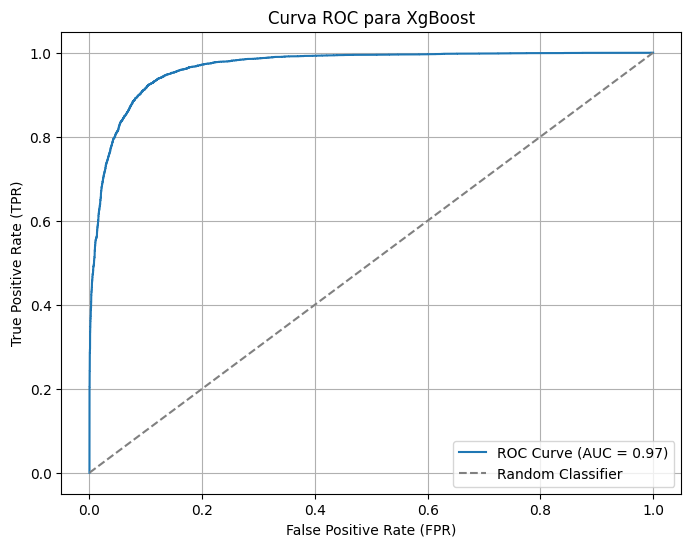

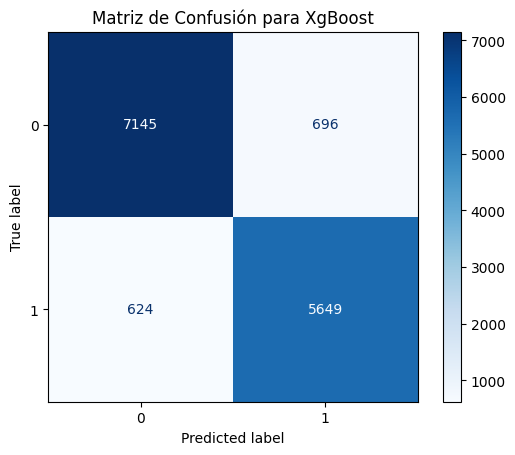

In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para XgBoost')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para XgBoost")
plt.show()

El modelo de XGBoost muestra un desempeño sólido y equilibrado con una precisión global del 91%. Ambas clases tienen buenos resultados en cuanto a precisión, recall y F1-score:

Clase 0 : El modelo tiene una alta precisión y recall para la clase negativa, lo que sugiere que el modelo es eficaz para detectar instancias de clase 0 y minimizar los falsos positivos.

Clase 1 : La precisión y el recall para la clase 1 también son muy altos, indicando que el modelo tiene un buen rendimiento al identificar correctamente las instancias de la clase 1, aunque podría mejorar ligeramente en la reducción de falsos positivos.
El F1-score ponderado de 0.91 refleja un buen equilibrio entre ambas clases y una capacidad sólida del modelo para manejar las clases desbalanceadas de manera efectiva.

### SVM- Maquinas de Soporte  Vectorial 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform



X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])


param_distributions = {
    'classifier__C': uniform(0.1, 100),  
    'classifier__kernel': ['linear'],  
    'classifier__gamma': ['scale', 'auto', uniform(0.001, 1.0)],  
    'classifier__degree': randint(2, 5),
    'classifier__coef0': uniform(0, 1),  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)


random_search.fit(X_train, y_train)


best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


In [ ]:

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC para SVM')
plt.legend(loc='best')
plt.grid()
plt.show()


cm = confusion_matrix(y_test, y_pred, labels=best_pipeline.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para SVM")
plt.show()

### Kernel SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])


param_distributions = {
    'classifier__C': uniform(0.001, 1000),  
    'classifier__kernel': ['poly', 'rbf', 'sigmoid'],  
    'classifier__degree': randint(2, 5),  
    'classifier__gamma': ['scale', 'auto'],  
    'classifier__max_iter': randint(100, 500)  
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  
    scoring='recall',  
    cv=5,  
    random_state=42,
    n_jobs=-1 
)


random_search.fit(X_train, y_train)

best_pipeline = random_search.best_estimator_


y_pred = best_pipeline.predict(X_test)


print("Mejores hiperparámetros encontrados:\n", random_search.best_params_)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


### Conclusines

Al evaluar los modelos presentados en clase y generar las curvas ROC para cada uno, se pudo observar que el modelo XGBoost sobresale como el más eficiente, alcanzando un AUC de 0.97. Este rendimiento superior indica que XGBoost tiene una mayor capacidad para distinguir entre las clases en comparación con los otros modelos probados, lo que lo convierte en la opción más robusta y precisa para presecir donde va a ocurrir un incendio.

Además, al observar el reporte de clasificación del modelo, se puede ver que alcanzó una precisión general de 0.91, lo que refleja un buen desempeño en términos de clasificación global. Los resultados detallados muestran que el modelo es muy efectivo al predecir la clase 0, con una precisión de 0.92 y un recall de 0.91. Para la clase 1, que podría ser más difícil de predecir debido a su menor representación en el conjunto de datos, se obtuvo una precisión de 0.89 y un recall de 0.90, lo que sugiere que el modelo tiene un buen equilibrio entre la predicción de ambas clases.

El F1-score, que combina precisión y recall, es 0.92 para la clase 0 y 0.90 para la clase 1, lo que indica un buen balance entre las métricas de clasificación y un desempeño robusto en ambos casos. En general, los resultados sugieren que el modelo tiene un rendimiento confiable y adecuado para la tarea, destacándose por su capacidad para manejar el desbalance entre clases y obtener predicciones precisas y consistentes.